## Electroencephalography (EEG)

Materials are based on tutorials developed by [MNE Tools](https://mne.tools/) team (see the [LICENSE](https://github.com/mne-tools/mne-python/blob/main/LICENSE.txt)).

### Brain activity measurements

There are several different methods of measuring brain activity, not just EEG. They differ in methodology, resolution, and purpose of the study. The most important of these are MRI/fMRI, MEG and NIRS/fNIRS.

It is worth reading their brief summary [here](https://www.brainlatam.com/knowledge-base/understanding-eeg-and-nirs-a-comparison-between-these-techniques-and-the-advantages-to-use-them-together-174).

Additionally, below is a brief comparison of temporal and spatial resolution taken from [T.J. Sejnowski, P.S. Churchland & J.A. Movshon - 2014 - Putting big data to good use in neuroscience](https://www.nature.com/articles/nn.3839).

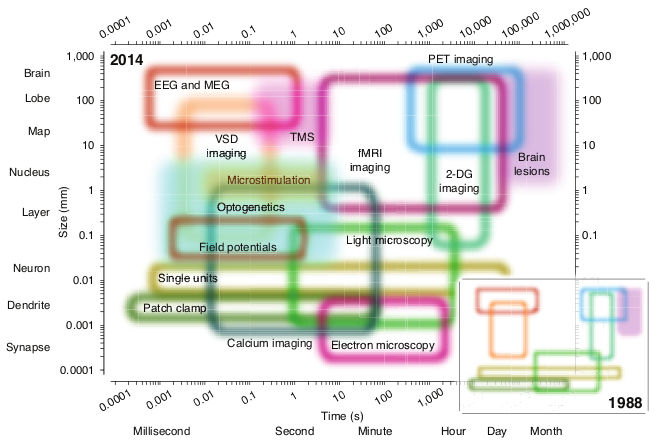

### Let's load some EEG data!

Today we will use a ready-to-use tool designed for neuro data called [MNE Tools](https://mne.tools/stable/index.html).

The notebook uses the sample EEG signals provided by MNE Tools team. But it may be more interesting to load your own signal recorded during the class!

In [1]:
# install MNE Tools package
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.5 MB/s eta 0:00:00


In [ ]:
# if you work locally (not at Google Colab) you can install pyQt5 for interactive matplotlib widgets
# !pip install pyqt5

In [ ]:
# necessary imports (as before)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# if you work locally (not at Google Colab) you can activate interactive plots by changing "inline" to "notebook"
%matplotlib inline

# for fancy plots
import bokeh.io, bokeh.plotting
bokeh.io.output_notebook()

# mne import
import mne

In [ ]:
# Download the dataset (to Virtual Machine local filesystem)
!wget https://krzysztof.kutt.pl/didactics/psaw/EEG_sample_raw.fif

In [ ]:
# load the sample dataset into MNE Raw (https://mne.tools/stable/generated/mne.io.Raw.html)
raw = mne.io.read_raw_fif('EEG_sample_raw.fif', preload=True)

In [ ]:
print(raw)

In [ ]:
# data summary is provided in Info structure
print(raw.info)

**Task 1**:
1. The data was pre-filtered beforehand - based on the above information, are you able to specify the filter cutoff?
2. What is the sampling rate of this data?

**Response (for Task 1):** `#_FILL_IN_YOUR_RESPONSE_HERE`

In [ ]:
# We only investigate EEG today, so we do not need the MEG channels
raw.pick_types(eeg=True, meg=False, stim=True, eog=True)

Now it is time to prepare some plots. `mne.Raw` has two interesting methods:
* [`Raw.plot()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot)
* [`Raw.plot_psd()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot_psd)

**Task 2**: read the docs (linked above) and prepare both types of plot for loaded data!

In [ ]:
# prepare the plot

# _FILL_IN_YOUR_CODE_HERE

In [ ]:
# prepare the PSD plot
# Tip: as the signal is already filtered, there is no need to set fmax above the lowpass cutoff

# _FILL_IN_YOUR_CODE_HERE

### EEG signal

As you've probably already noticed, here we have a signal collected by multiple electrodes.
They are not randomly distributed on the head, but placed according to an accepted 10-20 system (so that EEG studies can be comparable).

You can read more about [the 10-20 system on the Wikipedia](https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG)).

How are the sensors placed over the scalp in our case? Let's see!

In [ ]:
# if you have interactive graphs, you can also try '3d' instead of 'topomap'
raw.plot_sensors('topomap', show_names=True)

A second important note about the EEG signal is its susceptibility to many interferences. Among the most important are:
1. Eye artifacts (blinking and eye movement) -- big-amplitude, slow, positive wave prominent in frontal electrodes
2. Electrode's artifact caused by bad contact between electrode and skin
3. Swallowing artifacts
4. Common reference electrode's artifact caused by bad contact between reference electrode and skin -- huge wave similar in all channels

You can observe them in the figure below (from [Wikipedia](https://en.wikipedia.org/wiki/Electroencephalography)).

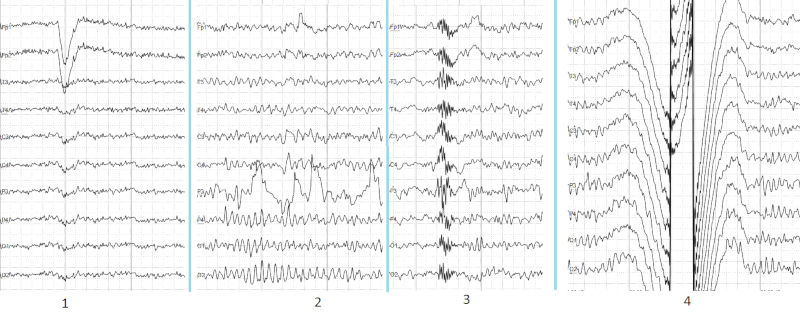

As eye artifacts will interest us more, here a more detailed drawing:  
(a) presents eye movement (saccade)  
(b) presents three eye blinks

(figure from the [report](https://www.researchgate.net/publication/242422365))

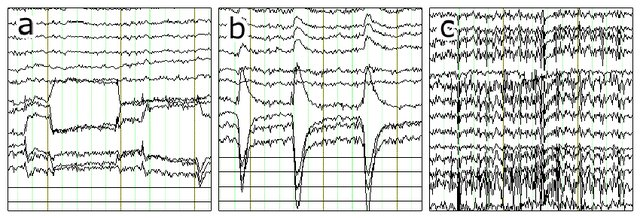

### Preprocessing with ICA

MNE Tools supports a variety of preprocessing approaches and techniques (maxwell filtering, signal-space projection, independent components analysis, filtering, downsampling, etc); see the full list of capabilities in the [`mne.preprocessing`](https://mne.tools/stable/preprocessing.html#module-mne.preprocessing) and [`mne.filter`](https://mne.tools/stable/preprocessing.html#module-mne.filter) submodules.

As the signal is already bandpass filtered, here we will clean up the data using independent component analysis (ICA).  
It is a common technique to get rid of eye artifacts (eye movement and blinks).

ICA splits the signal into `N` components. We can discard any of them as containing artifacts, and then reassemble the signal with the remaining components. As the ICA is some stupid maths - it is your responsibility as a researcher to select only the components with artifacts (you can remove some important parts of signal too and the whole analysis will not be valid).

In [ ]:
# set up and fit the ICA

# you can play with n_components and random_state
# _FILL_IN_YOUR_CODE_HERE
ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=800)
ica.fit(raw)
ica.plot_components()

**Task 3**:
1. Examine the plots above. Try to play with the ICA parameters and generate other graphs. Find at least one component representing the eye artifact (they should look similar to the ones below). Add the number of the component(s) to the `ica.exclude` list (e.g., `ica.exclude = [0, 13, 42]`)
2. Run the next cell to perform the ICA and generate plots. Check whether the eye artifacts are cleaned.
3. If you need to restore the original signal (before next ICA run), use the following cell (`raw = orig_raw.copy()`)

([image source](https://doi.org/10.3389/fnins.2018.00006))

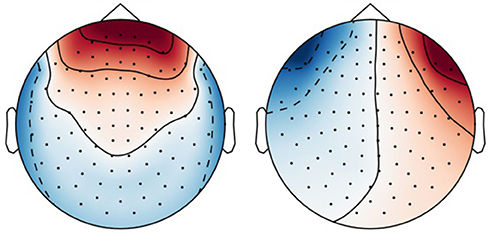

In [ ]:
ica.exclude = [] # _FILL_IN_YOUR_CODE_HERE

In [ ]:
## RUN THIS CELL TO PERFORM THE ICA AND GENERATE PLOTS

# make a copy (you can restore the signal if the results will be poor)
orig_raw = raw.copy()

# apply the ICA (i.e., exclude the selected components)
ica.apply(raw)

# Plot the original raw data and the new data with ICA applied
orig_raw.plot(start=0, duration=5, block=False)
raw.plot(start=0, duration=5, block=True)

In [ ]:
# Uncomment this line only if you want to perform ICA one more time! (to restore the pre-ICA signal)
# raw = orig_raw.copy()

### Detecting experimental events

Do you remember the synchronization issue from [Implementation lab](https://krzysztof.kutt.pl/did/courses:psaw:lab_impl)?

The sample dataset includes `STIM 014` channel that recorded electrical signals sent from the stimulus delivery computer. These pulses (often called "triggers") are used in this dataset to mark experimental events: stimulus onset, stimulus type, and participant response (button press).

Let's see these triggers!

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first five; there are three numbers for each: sample number, duration, ID

In the sample dataset, the mapping between numbers and real conditions looks like this (this is not so important; we only want to need how the analysis should be performed):

| Event ID | Condition |
|---|---|
| 1 | auditory stimulus (tone) to the left ear |
| 2 | auditory stimulus (tone) to the right ear |
| 3 | visual stimulus (checkerboard) to the left visual field |
| 4 | visual stimulus (checkerboard) to the right visual field |
| 5 | smiley face (catch trial) |
| 32 | subject button press |

We can prepare the dict with these names:

In [ ]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

How often do they appear in the data? Let's find out!

In [ ]:
mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                    first_samp=raw.first_samp)

### Epoching continuous data

The signal is filtered, we know at which points stimuli and responses occur. What's next?

Our task will be to cut the whole signal into fragments (so-called "epochs") covering the appropriate period before and after the trigger occurs. We will then have the ability to compare (and average) brainwave activity waveforms for different types of stimuli.

There is a dedicated [`mne.Epochs`](https://mne.tools/stable/generated/mne.Epochs.html) class that will take care of this for us.

In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5, preload=True)

In [ ]:
print(epochs)

To avoid biases, we will use `equalize_event_counts()` first to randomly sample epochs from each condition to match the number of epochs present in the condition with the fewest good epochs.

In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']

del epochs  # free up memory

**Task 4**: Let's see some plots of epoched data.  
Read the docs of [`Epochs.plot_image()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot_image) and generate some plots (at least one for `aud_epochs` and one for `vis_epochs`)!

In [ ]:
# prepare plots
# Note: select some channels to see the real epochs (figure for picks=['eeg'] will not be cool)

# _FILL_IN_YOUR_CODE_HERE

### Evoked response potentials (ERP)

You may perform some additional analysis and filtering on epoched data, but finally, you want to calculate the averages. As a result you will get the so-called ERPs, i.e., averaged responses to specific stimuli types (*evoked* by these stimuli).

Averaging is important because it is an additional noise removal step - after averaging multiple trials, the noise should reduce to zero.

In [ ]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

Averages prepared in this way can be compared with each other, e.g., a control group and an experimental group, or two experimental groups as below.

In [ ]:
# plot 1 with comparison of averages of two groups
mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

In [ ]:
# plot 2 with all auditory ERPs
aud_evoked.plot_joint()

In [ ]:
# plot 3 - topomaps at arbitrary times (you can change the times if you wish)
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2])

**Task 5**: Briefly describe the results of this experiment, i.e., try to interpret the graph above.

**Response (for Task 5):** `#_FILL_IN_YOUR_RESPONSE_HERE`

### ERPs in Brain-Computer Interfaces

This technique is useful not only in psychological research but also in interface design. If this interests you then read about **P300 Speller** - a typing / control interface for paralyzed people based on ERP called **P300** (it is a **P**ositive wave about **300** ms after stimuli presentation).

## Advanced Electroencephalography (EEG)

*This part of the notebook presents more advanced topics and is optional.*

### Time-frequency analysis

ERP analysis is the most common type of EEG signal analysis (*There are even [textbooks dedicated to this topic](https://mitpress.mit.edu/books/introduction-event-related-potential-technique-second-edition)!*).
But, of course, time-frequency analysis is also done, e.g., related to sleeping activity.

Do you know the concepts of alpha and beta waves? Yep! It's here!

And you have already done this analysis at the beginning. Do you remember the PSD plot from *Task 2*?

To get the power of the alpha waves, just cut the PSD at 8-12 Hz and calculate the area under the curve (do you remember integration from high school?).

**Task 6**: calculate the power of the delta (1-4 Hz), theta (4-8), alpha (8-12) and beta (12-30) waves in the `raw` signal.

Tip 1: You can use [`mne.time_frequency.psd_array_welch()`](https://mne.tools/stable/generated/mne.time_frequency.psd_array_welch.html#mne.time_frequency.psd_array_welch) to get the psds values.  
Tip 2: You can use [`scipy.integrate.simps()`](https://docs.scipy.org/doc/scipy-1.4.1/reference/generated/scipy.integrate.simps.html) (*note: in the newest version of SciPy it was renamed to [`scipy.integrate.simpson()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html)*) to integrate (for given band!)

In [ ]:
# _FILL_IN_YOUR_CODE_HERE

Of course, there is a ready-to-use function that will plot all the bands at one time (but it works only for Epochs):

In [ ]:
aud_epochs.plot_psd_topomap(normalize=True)